# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [17]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [18]:
import scipy.stats
from statsmodels.stats import weightstats
import numpy as np
import matplotlib.pyplot as plt

## Is the distribution of body temperatures normal?

I need to see a list of the available columns and determine which one is body temperature.

In [19]:
df.columns

Index(['temperature', 'gender', 'heart_rate'], dtype='object')

Out of the three columns, "temperature" seems most like to represent body temperature.
Next, I would like to see a histogram and normal probability plot.

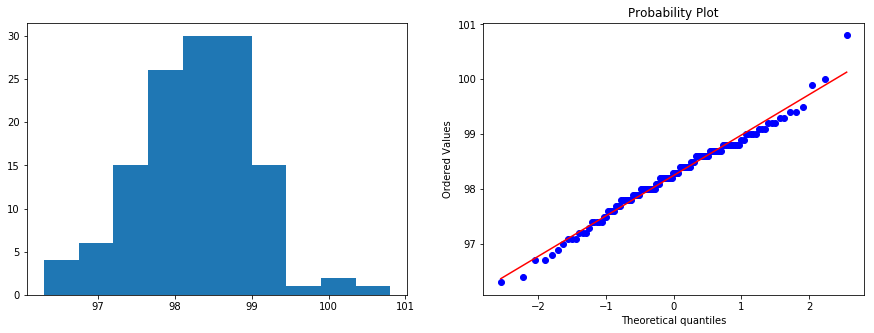

In [20]:
# Used code from stackoverflow: https://stackoverflow.com/questions/46127030/how-to-use-python-to-draw-a-normal-probability-plot-by-using-certain-column-data
body_temperatures = df['temperature']

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

histogram = plt.subplot(1, 2, 1)
histogram.hist(body_temperatures)

norm_prob_plot = plt.subplot(1, 2, 2)
scipy.stats.probplot(body_temperatures, plot=norm_prob_plot)

plt.show()

At a glance, the data looks normal based on the two plots. There does seem to be a left skew based on the histogram.

I will confirm that with the a normal test using scipy.

In [21]:
# Documentation for scipy.stats.normaltest: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
k2, p = scipy.stats.normaltest(body_temperatures)
print(p)

0.258747986349


At a significance level of 0.05, p>alpha, so we fail to reject the null hypothesis that body temperatures are normally distributed.

H_null: Body temperatures are normally distributed <br>
H_alternative: Body temperatures are not normally distributed

## Is the sample size large? Are the observations independent?

In [22]:
print("There are " + str(len(df)) + " observation in the dataset")
print("There are " + str(len(df.drop_duplicates())) + " unique observation in the dataset")

There are 130 observation in the dataset
There are 127 unique observation in the dataset


There are 130 observations, so it is a large dataset (more than 30 observations). Given that most of the observations are unique, it is reasonable to assume that they were collected independently.

## Is the true population mean really 98.6 degrees F?

#### Based on bootstrap replicates

I need to make a function that generates bootstrap replicates for a function, and use it to generate a 1000 bootstrap replicates.

In [23]:
def generate_bootstrap_replicates(data, func):
    sample = np.random.choice(data, len(data))
    return func(sample)

bs_replicates = []
for i in range(1000):
    bs_replicates.append(generate_bootstrap_replicates(body_temperatures, np.mean))

Next, I use a two-tailed test to determine whether the mean is 98.6 (with significance level of 0.05)

H_null: Population mean is 98.6 <br>
H_alternative: Population mean is not 98.6

In [24]:
alpha = 5 # significance level (percentage)
confidence_interval = np.percentile(bs_replicates, [alpha/2, 100 - alpha/2])
print(confidence_interval)

[ 98.12615385  98.36463462]


Because 98.6 does not fall within the 95% confidence interval, we reject the null hypothesis that the mean is 98.6, and conclude that the mean is not 98.6.

#### Based on frequentist statistical testing

I will use a one-sample test because I am comparing the data (body temperatures) to a single number (98.6). I will use z-score because I have a large sample size (>30 observations)

H_null: Population mean is 98.6 <br>
H_alternative: Population mean is not 98.6

In [25]:
z_score, p_value = weightstats.ztest(body_temperatures, value=98.6, alternative='two-sided')
print("The p-value from the z-test is", p_value)

The p-value from the z-test is 4.9021570141e-08


At a significance level of 0.05, p<alpha, so we reject the null hypothesis that the population mean is 98.6.

In [26]:
t_value, p_value = scipy.stats.ttest_1samp(body_temperatures, 98.6)
print("The p-value from the t-test is", p_value)

The p-value from the t-test is 2.41063204156e-07


Using a one-sample t-test and significance level of 0.05, we still reject the null hypothesis and conclude the population mean is not 98.6. However, the p value was higher using the t-test because there are more values at the tails of a t-distribution than normal distribution.

## Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [27]:
# Draw random sample (10)
body_temperature_sample = np.random.choice(body_temperatures, 10)

# t-test
t_value, p_value_t = scipy.stats.ttest_1samp(body_temperatures, 98.6)

# z-test
z_score, p_value_z = weightstats.ztest(body_temperatures, value=98.6, alternative='two-sided')

print("The p-value from the z-test is", p_value_z)
print("The p-value from the t-test is", p_value_t)

The p-value from the z-test is 4.9021570141e-08
The p-value from the t-test is 2.41063204156e-07


#### Which one is the correct one to use?
Since the sample size is small (10 < 30), the t-test is the correct one to use.

#### What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?
Even with a small sample size, the p-value for the t-test is larger. Given that the t distribution has more values at the tails than normal distributions, it is the appropriate model for smaller sample sizes which have looser centrality.

## At what temperature should we consider someone's temperature to be "abnormal"?
I will define "normal" to be any temperature within three standard deviations of the mean. This is approximately 99.73% of the values.

In [28]:
mean_body_temperature = body_temperatures.mean()
stddev_body_temperature = body_temperatures.std()
normal_temperatures = scipy.stats.norm.interval(0.9973, loc=mean_body_temperature, scale=stddev_body_temperature)
print("The margin of error is +/-", (normal_temperatures[1] - normal_temperatures[0])/len(normal_temperatures))
print("Body temperature is abnormally low when it is lower than", normal_temperatures[0])
print("Body temperature is abnormally higher when it is higher than", normal_temperatures[1])

The margin of error is +/- 2.19953260555
Body temperature is abnormally low when it is lower than 96.0496981637
Body temperature is abnormally higher when it is higher than 100.448763375


## Is there a significant difference between males and females in normal temperature?

H_null: Male and female body temperatures are not significantly different <br>
H_alternative: Male and female body temperatures are significantly different

In [29]:
# Get male and female temperatures
male_body_temperatures = df.loc[df['gender'] == 'M','temperature']
female_body_temperatures = df.loc[df['gender'] == 'F','temperature']
print("There are", len(male_body_temperatures), "males")
print("There are", len(female_body_temperatures), "females")

# Perform 2-sample z-test
z_score, p_value = weightstats.ztest(male_body_temperatures, female_body_temperatures, value=98.6, alternative='two-sided')
print("The p-value from the z-test is", p_value)

There are 65 males
There are 65 females
The p-value from the z-test is 0.0


At a significance level of 0.05, we reject the null hypothesis and conclude that male and female body temperatures are significantly different

#### What testing approach did you use and why?
I used a 2-sample z-test because, I had two different samples (male and female body temperatures), and both samples were large (65 > 30).

#### Write a story with your conclusion in the context of the original problem.

In 1868, Carl Wunderlich reported that the mean normal body temperature was 98.6$^{\circ}$F. Using a dataset that was constructed to match data collected for a 1992 paper in the Journal of the American Medical Association, I conducted statistical tests to verify whether Wunderlichs findings are correct.

Based on the tests, I concluded that the mean normal body temperature is not 98.6$^{\circ}$F, as reported by Wunderlichs, and that male and female body temperatures are different. A possible cause for this is improvement in measurement methods for body temperatures between 1868 and 1992 (in other words, better thermometers).